# 从图片生成数据库
### 生成`cnn_custom_simple.ipynb`文件里所需的`custom_data.npz`数据文件

In [1]:
import numpy as np
import os
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt
%matplotlib inline
cwd = os.getcwd()
print ("所有python包载入完毕") 
print ("当前目录为 [%s]" % (cwd) )

所有python包载入完毕
当前目录为 [/home/xrong/Documents/Code/course/DeepLearningCourseCodes/04_CNN_advances]


## 配置

In [2]:
# 数据路径
paths = ["data/celebs/Arnold_Schwarzenegger"
        , "data/celebs/Junichiro_Koizumi"
        , "data/celebs/Vladimir_Putin"
        , "data/celebs/George_W_Bush"]
categories = ['Terminator', 'Koizumi', 'Putin', 'Bush']
# 配置
imgsize   = [64, 64]
use_gray  = 1
data_name = "custom_data"

print ("你的图片应当在此路径下：")
for i, path in enumerate(paths):
    print (" [%d/%d] %s" % (i, len(paths), path)) 
print ("数据将会被存储在此路径下：\n [%s]" 
       % (cwd + '/data/' + data_name + '.npz'))

你的图片应当在此路径下：
 [0/4] data/celebs/Arnold_Schwarzenegger
 [1/4] data/celebs/Junichiro_Koizumi
 [2/4] data/celebs/Vladimir_Putin
 [3/4] data/celebs/George_W_Bush
数据将会被存储在此路径下：
 [/home/xrong/Documents/Code/course/DeepLearningCourseCodes/04_CNN_advances/data/custom_data.npz]


## RGB2GARY图像色域转换

In [3]:
def rgb2gray(rgb):
    if len(rgb.shape) is 3:
        return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    else:
        return rgb

## 图片载入

In [4]:
nclass     = len(paths)
valid_exts = [".jpg",".gif",".png",".tga", ".jpeg"]
imgcnt     = 0
for i, relpath in zip(range(nclass), paths):
    path = cwd + "/" + relpath
    flist = os.listdir(path)
    for f in flist:
        if os.path.splitext(f)[1].lower() not in valid_exts:
            continue
        fullpath = os.path.join(path, f)
        currimg  = imread(fullpath)
        # 需要时则转为灰阶图像
        if use_gray:
            grayimg  = rgb2gray(currimg)
        else:
            grayimg  = currimg
        # 缩放
        graysmall = imresize(grayimg, [imgsize[0], imgsize[1]])/255.
        grayvec   = np.reshape(graysmall, (1, -1))
        # 存储 
        curr_label = np.eye(nclass, nclass)[i:i+1, :]
        if imgcnt is 0:
            totalimg   = grayvec
            totallabel = curr_label
        else:
            totalimg   = np.concatenate((totalimg, grayvec), axis=0)
            totallabel = np.concatenate((totallabel, curr_label), axis=0)
        imgcnt    = imgcnt + 1
print ("共有 %d 张图片" % (imgcnt))

共有 681 张图片


## 将数据分为训练与测试两部分 

In [5]:
def print_shape(string, x):
    print ("SHAPE OF [%s] IS [%s]" % (string, x.shape,))
    
randidx    = np.random.randint(imgcnt, size=imgcnt)
trainidx   = randidx[0:int(4*imgcnt/5)]
testidx    = randidx[int(4*imgcnt/5):imgcnt]
trainimg   = totalimg[trainidx, :]
trainlabel = totallabel[trainidx, :]
testimg    = totalimg[testidx, :]
testlabel  = totallabel[testidx, :]
print_shape("totalimg", totalimg)
print_shape("totallabel", totallabel)
print_shape("trainimg", trainimg)
print_shape("trainlabel", trainlabel)
print_shape("testimg", testimg)
print_shape("testlabel", testlabel)

SHAPE OF [totalimg] IS [(681, 4096)]
SHAPE OF [totallabel] IS [(681, 4)]
SHAPE OF [trainimg] IS [(544, 4096)]
SHAPE OF [trainlabel] IS [(544, 4)]
SHAPE OF [testimg] IS [(137, 4096)]
SHAPE OF [testlabel] IS [(137, 4)]


## 存为NPZ格式

In [6]:
savepath = cwd + "/data/" + data_name + ".npz"
np.savez(savepath, trainimg=trainimg, trainlabel=trainlabel
         , testimg=testimg, testlabel=testlabel
         , imgsize=imgsize, use_gray=use_gray, categories=categories)
print ("SAVED TO [%s]" % (savepath))

SAVED TO [/home/xrong/Documents/Code/course/DeepLearningCourseCodes/04_CNN_advances/data/custom_data.npz]


## 载入NPZ文件

In [7]:
# 载入
cwd = os.getcwd()
loadpath = cwd + "/data/" + data_name + ".npz"
l = np.load(loadpath)
print (l.files)

# 解析数据
trainimg_loaded   = l['trainimg']
trainlabel_loaded = l['trainlabel']
testimg_loaded    = l['testimg']
testlabel_loaded  = l['testlabel']
categories_loaded = l['categories']

print ("[%d] TRAINING IMAGES" % (trainimg_loaded.shape[0]))
print ("[%d] TEST IMAGES" % (testimg_loaded.shape[0]))
print ("LOADED FROM [%s]" % (savepath))

['trainlabel', 'imgsize', 'trainimg', 'testimg', 'testlabel', 'use_gray', 'categories']
[544] TRAINING IMAGES
[137] TEST IMAGES
LOADED FROM [/home/xrong/Documents/Code/course/DeepLearningCourseCodes/04_CNN_advances/data/custom_data.npz]


## 绘制载入数据

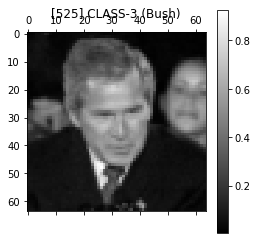

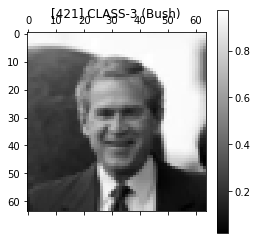

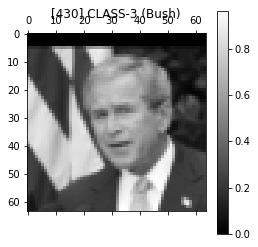

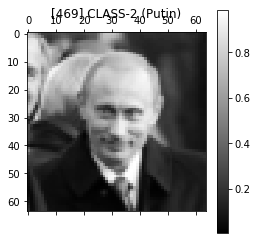

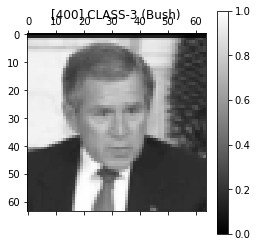

In [8]:
ntrain_loaded = trainimg_loaded.shape[0]
batch_size = 5;
randidx = np.random.randint(ntrain_loaded, size=batch_size)
for i in randidx: 
    currimg = np.reshape(trainimg_loaded[i, :], (imgsize[0], -1))
    currlabel_onehot = trainlabel_loaded[i, :]
    currlabel = np.argmax(currlabel_onehot) 
    if use_gray:
        currimg = np.reshape(trainimg[i, :], (imgsize[0], -1))
        plt.matshow(currimg, cmap=plt.get_cmap('gray'))
        plt.colorbar()
    else:
        currimg = np.reshape(trainimg[i, :], (imgsize[0], imgsize[1], 3))
        plt.imshow(currimg)
    title_string = ("[%d] CLASS-%d (%s)" 
                    % (i, currlabel, categories_loaded[currlabel]))
    plt.title(title_string) 
    plt.show()